<a href="https://colab.research.google.com/github/tawanph/COIN/blob/main/%E0%B8%95%E0%B9%89%E0%B8%99%E0%B8%89%E0%B8%9A%E0%B8%B1%E0%B8%9A_Coin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import operator
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
def coldstart():
    #f=open("/content/drive/MyDrive/Colab Notebooks/random0.txt", "r")
    f=open("/content/drive/MyDrive/Colab Notebooks/RndTbl.txt", "r")
    x=f.read()
    x= x.replace('\n', '')
    n = 2
    k=0
    c=""
    q=[]
    for i in range(0, len(x), n):
        k=k+1
        if k>1 :
                c=(x[i]+x[i+1])
                q.append(c)
        if k==9:
                k=0
    rdx=0
    maxq=len(q)
    return rdx,maxq,q

def rnd8(rd_q):
    global rd_i
    global tablecount
    r=[]
    for i in range(0,8):

        r.append(rd_q[rd_i])
        if(rd_i+1<max_q):
            rd_i=rd_i+1
        else:
            tablecount+=1
            rd_i=0
    r[7],r[6],r[5],r[4],r[3],r[2],r[1],r[0]=r[0],r[1],r[2],r[3],r[4],r[5],r[6],r[7]
    return r

def init_pop():
    pop=[]

    for i in range(0,8):
        pop.append(127)
    return pop

def gen_pop(pop,rd_q):
    rx = rnd8(rd_q)
    ry = rnd8(rd_q)
    valuex = ""
    valuey = ""

    for i in range(0,8):

                if int(rx[i],16) < pop[i]:
                    valuex += "1"
                    if dbmode==2:
                        print ("x",pop[i],int(rx[i],16),1)
                else :
                    valuex += "0"
                    if dbmode==2:
                        print ("x",pop[i],int(rx[i],16),0)

    for i in range(0,8):
                if int(ry[i],16) < pop[i]:
                    valuey += "1"
                    if dbmode==2:
                        print ("y",pop[i],int(ry[i],16),1)
                else :
                    valuey += "0"
                    if dbmode==2:
                        print ("y",pop[i],int(ry[i],16),0)

    #print (valuex,valuey)
    Xo=valuex
    Yo=valuey
    #print (Xo,Yo)
    return Xo,Yo



def fitness(x):
        a=0
        for i in x:
            if i=='1':
                a=a+1
        return a

def fit332(x):
        a=0
        b=0
        c=0
        for i in x[0]+x[1]+x[2]:
            if i=='1':
                a=a+1
        if a==2:
            a=0
        else:
            if a==0:
                a=2

        for i in x[3]+x[4]+x[5]:
            if i=='1':
                b=b+1
        if b==2:
            b=0
        else:
            if b==0:
                b=2

        for i in x[6]+x[7]:
            if i=='1':
                c=c+1
        if c==1:
            c=0
        else:
            if c==0:
                c=1
        #print(a+b+c)
        return a+b+c

def comp332(x,y):
    if fit332(x)>fit332(y):
        return 0,0
    if fit332(x)<fit332(y):
        return 0,1
    if fit332(x)==fit332(y):
        return 1,0


def comp(x,y):
    if fitness(x)>fitness(y):
        return 0,0
    if fitness(x)<fitness(y):
        return 0,1
    if fitness(x)==fitness(y):
        return 1,0

def upopA(pop,x,y):
    binx=x
    biny=y
    for i in range(0,8):
        #print (binx[i],biny[i])
        if int(binx[i],2)>int(biny[i],2):
            if pop[i]+rate<255:
                pop[i]+=rate
            else:
                pop[i]=255

        if int(binx[i],2)<int(biny[i],2):
            if pop[i]-rate>0:
                pop[i]-=rate
            else:
                pop[i]=0;


    return pop

def upopB(pop,x,y):
    binx=x
    biny=y
    for i in range(0,8):
        #print (binx[i],biny[i])
        if int(binx[i],2)>int(biny[i],2):
            if pop[i]-rate>0:
                pop[i]-=rate
            else:
                pop[i]=0;
        if int(binx[i],2)<int(biny[i],2):
            if pop[i]+rate<255:
                pop[i]+=rate
            else:
                pop[i]=255

    return pop


In [ ]:
#  code cold start initial pointer to the first seqence of random number from table
rd_i,max_q,rd_q=coldstart() #index to first row of LUT  (RND Table)
tablecount=0  # count full table (Circular used)
print (rd_i,max_q)

pop=init_pop()
again=1
round=0  # inial to first experiment
rate=5   #set Learning weight

0 267059


In [ ]:
i=0
for a in range(max_q):
    i=i+1;
    if i%32 == 0:
        print(a,end=':')
    print(rd_q[a],end=' ')
    if i%32 == 15:
        print(end=' : ')
    if i%32 == 31:
        print()


Streaming output truncated to the last 5000 lines.
107103:96 12 55 22 EF 7D 38 6E 66 73 67 72 BD 8B A7 52  : ED 2D B9 CB 82 26 B7 F2 0C C2 8A 98 46 6A A5 4E 
107135:E8 73 E0 84 0D 72 30 45 E8 C5 0D AE E7 5C 38 F5  : 4D 0D C7 49 D6 71 56 98 85 2C CC C8 FF 1A 58 34 
107167:F7 C3 F8 A4 38 BA BA 5E EA 8F 69 82 4A 15 E5 E9  : 0A 35 80 95 64 EC 1F 7B CA 42 33 F1 4D C8 61 B7 
107199:BC 68 F5 81 DE 58 C3 EC 14 C2 5A 16 C7 75 0F B1  : A0 2D DC 91 3C C3 39 F3 C5 B0 09 22 45 53 04 10 
107231:78 9B E5 25 95 8C 57 AE 7E 14 48 23 13 D8 B1 4F  : BC 0F 16 73 DD 5E B4 BB 62 CF 0C 3C 55 54 F6 92 
107263:88 17 F7 97 24 F3 71 4A AA 55 FA 91 65 7A 06 7E  : C0 A9 5D B1 EF F9 0D 83 5A 1C E5 A5 0B C2 7B E4 
107295:30 0E 3F 78 30 A0 13 24 DF BD 8D BA 6B D3 C8 DE  : 98 E8 0A 86 EE A9 35 48 F7 1A A4 8D 0E FE 20 36 
107327:5A 14 43 37 0C 6E C3 FD F6 AC 76 BB C0 AD D8 8B  : 80 B8 DE C5 C0 47 7C 26 05 68 83 E9 B9 FA 49 7E 
107359:5E 7B 39 3C D8 D3 68 24 B3 63 32 76 9F 08 24 3A  : 13 46 29 3D 1C 25 18 08 25 48 DC 90

Round 0
x 127 42 1
x 127 94 1
x 127 139 0
x 127 175 0
x 127 155 0
x 127 92 1
x 127 8 1
x 127 25 1
y 127 48 1
y 127 36 1
y 127 129 0
y 127 242 0
y 127 234 0
y 127 11 1
y 127 57 1
y 127 11 1
XY 11000111 11000111
ans 1 0
last pop [127, 127, 127, 127, 127, 127, 127, 127]
Round 1
x 127 88 1
x 127 129 0
x 127 42 1
x 127 132 0
x 127 118 1
x 127 211 0
x 127 186 0
x 127 41 1
y 127 49 1
y 127 24 1
y 127 185 0
y 127 18 1
y 127 201 0
y 127 9 1
y 127 240 0
y 127 161 0
XY 10101001 11010100
ans 1 0
last pop [127, 127, 127, 127, 127, 127, 127, 127]
Round 2
x 127 173 0
x 127 130 0
x 127 142 0
x 127 164 0
x 127 215 0
x 127 171 0
x 127 131 0
x 127 235 0
y 127 90 1
y 127 157 0
y 127 78 1
y 127 157 0
y 127 76 1
y 127 50 1
y 127 133 0
y 127 13 1
XY 00000000 10101101
ans 0 1
last pop [132, 127, 132, 127, 132, 132, 127, 132]
Round 3
x 132 107 1
x 127 234 0
x 132 64 1
x 127 195 0
x 132 140 0
x 132 101 1
x 127 36 1
x 132 55 1
y 132 169 0
y 127 225 0
y 132 250 0
y 127 231 0
y 132 223 0
y 132 101 1
y 127 249 0
y 

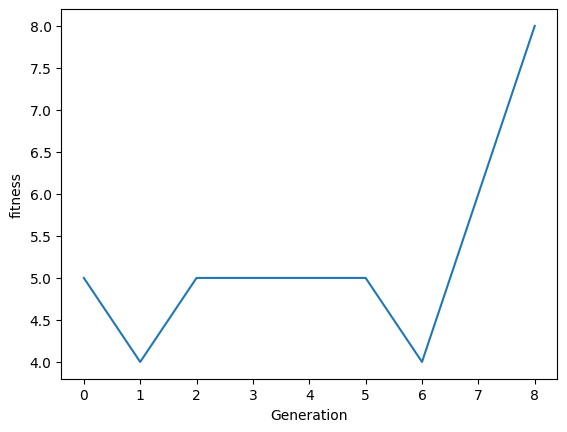

In [ ]:
# Beta1 Simple CGA
# code random

dbmode=2
progress=[]
while again==1:
    print ("Round",round)
    x,y=gen_pop(pop,rd_q)
    print ("XY",x,y)
    fx=fitness(x)
    fy=fitness(y)
    if fx==8:
        again=0
        print ("end by X")
    if fy==8:
        again=0
        print ("end by Y")

    if (fx>=fy):
        progress.append(fx)
    if (fx<fy):
        progress.append(fy)

    a,b=comp(x,y)
    print("ans",a,b)
    if (a==0) & (b==0) :

        pop=upopA(pop,x,y)
    if (a==0) & (b==1) :

        pop=upopB(pop,x,y)
    print ("last pop",pop)
    round+=1
print ('Progress')
print (progress)
plt.plot(progress)
plt.ylabel('fitness')
plt.xlabel('Generation')
plt.show()


In [ ]:
# Beta2 Simple CGA with Repeat N=10 times
rd_i,max_q,rd_q=coldstart() #  code cold start initial pointer to the first seqence of random number from table
print (rd_i,max_q)
pop=init_pop()             #index to first row of LUT  (RND Table)

repeat=10 # set experiment times.
episode=0
rs=[]
while episode<repeat:
    again=1
    round=0            # inial to first experiment
    rate=5             # set Learning Rate
    pop=init_pop()     # initial populations
    progress=[]
    print ("Episode ",episode+1)
    print ("RND_index",rd_i,"of ",max_q)
    while again==1:
        print ("Round",round)
        x,y=gen_pop(pop,rd_q)
        print ("XY",x,y)
        fx=fitness(x)
        fy=fitness(y)
        if fx==8:
            again=0
            print ("end by X")
        if fy==8:
            again=0
            print ("end by Y")

        if (fx>=fy):
            progress.append(fx)
        if (fx<fy):
            progress.append(fy)

        a,b=comp(x,y)
        print("ans",a,b)

        if (a==0) & (b==0) :
            pop=upopA(pop,x,y)
        if (a==0) & (b==1) :
            pop=upopB(pop,x,y)
        print ("last pop",pop)
        round+=1
    rs.append(round)
    print ('Progress')
    print (progress)
    plt.plot(progress)
    plt.ylabel('fitness')
    plt.xlabel('Generation')
    plt.show()
    episode+=1
print (rs)

0 267059
Episode  1
RND_index 0 of  267059
Round 0


NameError: name 'dbmode' is not defined

In [ ]:
rd_i,max_q,rd_q=coldstart()
print (rd_i,max_q)
pop=init_pop()
again=1
round=0
rate=5

0 267059


In [ ]:
while again==1:
    print ("Round",round)
    x,y=gen_pop(pop,rd_q)
    if fit332(x)==8:
        again=0
        print ("end by X")
    if fit332(y)==8:
        again=0
        print ("end by Y")
    a,b=comp332(x,y)
    print(a,b)
    if (a==0) & (b==0) :
        pop=upopA(pop,x,y)
    if (a==0) & (b==1) :
        pop=upopB(pop,x,y)
    print (pop)
    round+=1


Round 0
x 127 42 1
x 127 94 1
x 127 139 0
x 127 175 0
x 127 155 0
x 127 92 1
x 127 8 1
x 127 25 1
y 127 48 1
y 127 36 1
y 127 129 0
y 127 242 0
y 127 234 0
y 127 11 1
y 127 57 1
y 127 11 1
1 0
[127, 127, 127, 127, 127, 127, 127, 127]
Round 1
x 127 88 1
x 127 129 0
x 127 42 1
x 127 132 0
x 127 118 1
x 127 211 0
x 127 186 0
x 127 41 1
y 127 49 1
y 127 24 1
y 127 185 0
y 127 18 1
y 127 201 0
y 127 9 1
y 127 240 0
y 127 161 0
1 0
[127, 127, 127, 127, 127, 127, 127, 127]
Round 2
x 127 173 0
x 127 130 0
x 127 142 0
x 127 164 0
x 127 215 0
x 127 171 0
x 127 131 0
x 127 235 0
y 127 90 1
y 127 157 0
y 127 78 1
y 127 157 0
y 127 76 1
y 127 50 1
y 127 133 0
y 127 13 1
0 0
[122, 127, 122, 127, 122, 122, 127, 122]
Round 3
x 122 107 1
x 127 234 0
x 122 64 1
x 127 195 0
x 122 140 0
x 122 101 1
x 127 36 1
x 122 55 1
y 122 169 0
y 127 225 0
y 122 250 0
y 127 231 0
y 122 223 0
y 122 101 1
y 127 249 0
y 122 194 0
0 1
[117, 127, 117, 127, 122, 122, 122, 117]
Round 4
x 117 228 0
x 127 46 1
x 117 156 0
x 12

In [ ]:
pop=init_pop()
again=1
round=0
rate=5
while again==1:
    print ("Round",round)
    x,y=gen_pop(pop,rd_q)
    if fit332(x)==8:
        again=0
        by="X"
    if fit332(y)==8:
        again=0
        by="Y"
    a,b=comp332(x,y)
    print(a,b)
    if (a==0) & (b==0) :
        pop=upopA(pop,x,y)
    if (a==0) & (b==1) :
        pop=upopB(pop,x,y)
    print (pop)
    round+=1
print ("Round End",round)
print ("BY",by)

Round 0
x 127 76 1
x 127 147 0
x 127 210 0
x 127 149 0
x 127 54 1
x 127 255 0
x 127 110 1
x 127 6 1
y 127 191 0
y 127 43 1
y 127 16 1
y 127 49 1
y 127 112 1
y 127 90 1
y 127 250 0
y 127 17 1
0 0
[132, 122, 122, 122, 127, 122, 132, 127]
Round 1
x 132 76 1
x 122 19 1
x 122 104 1
x 122 233 0
x 127 82 1
x 122 118 1
x 132 239 0
x 127 180 0
y 132 253 0
y 122 152 0
y 122 92 1
y 122 193 0
y 127 23 1
y 122 238 0
y 132 180 0
y 127 68 1
0 0
[137, 127, 122, 122, 127, 127, 132, 122]
Round 2
x 137 73 1
x 127 76 1
x 122 219 0
x 122 143 0
x 127 5 1
x 127 51 1
x 132 64 1
x 122 139 0
y 137 200 0
y 127 63 1
y 122 212 0
y 122 74 1
y 127 153 0
y 127 40 1
y 132 7 1
y 122 22 1
0 1
[132, 127, 122, 127, 122, 127, 132, 127]
Round 3
x 132 202 0
x 127 156 0
x 122 141 0
x 127 26 1
x 122 106 1
x 127 186 0
x 132 2 1
x 127 132 0
y 132 17 1
y 127 45 1
y 122 158 0
y 127 140 0
y 122 239 0
y 127 11 1
y 132 216 0
y 127 209 0
1 0
[132, 127, 122, 127, 122, 127, 132, 127]
Round 4
x 132 77 1
x 127 73 1
x 122 187 0
x 127 142 0